In [1]:
# Import Package
import os
import pandas as pd
import numpy as np

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Package untuk cleaning, modelling, dan evaluation model
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### Bussiess problem

membangun model yang dapat memprediksi credit risk menggunakan dataset yang disediakan oleh company yang terdiri dari data pinjaman yang diterima dan yang ditolak , menyediakan media visual dan mempresentasikan hasil analisis kepada klien

### Read Data set

In [2]:
df = pd.read_csv('loan_data_2007_2014 (1).csv')
df.head()

C:\Users\giryi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### EDA

<AxesSubplot:>

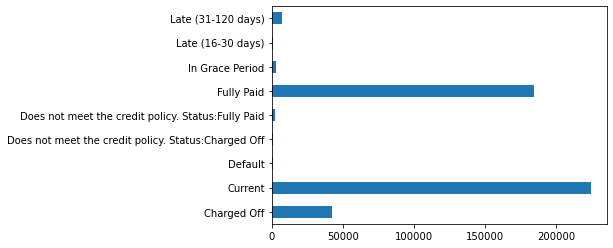

In [4]:
df['loan_status'].value_counts().sort_index().plot.barh()

<AxesSubplot:>

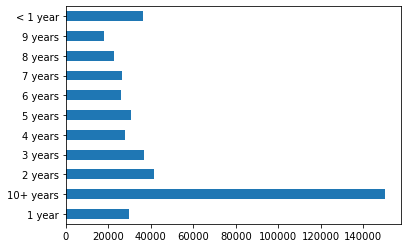

In [5]:
df['emp_length'].value_counts().sort_index().plot.barh()

C:\Users\giryi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

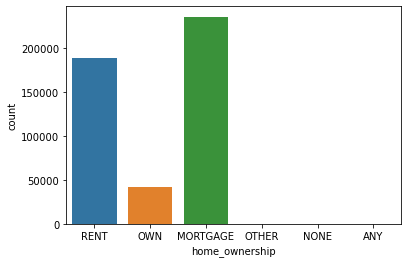

In [6]:
sns.countplot(df['home_ownership'])

C:\Users\giryi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='verification_status', ylabel='count'>

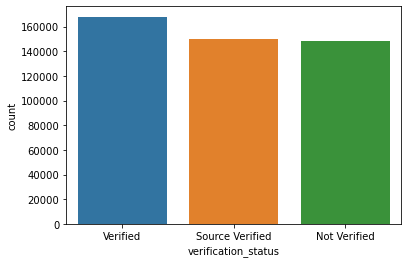

In [7]:
sns.countplot(df['verification_status'])

<AxesSubplot:>

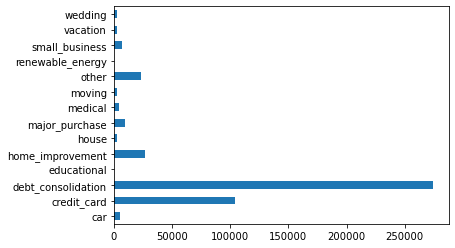

In [8]:
df['purpose'].value_counts().sort_index().plot.barh()

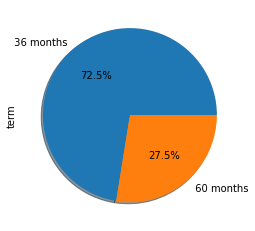

In [9]:
# Mencari perbandingan label/class
df['term'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

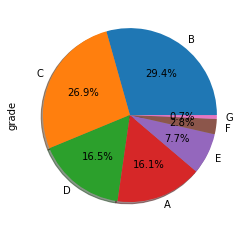

In [10]:
# Mencari perbandingan label/class
df['grade'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

<AxesSubplot:xlabel='term', ylabel='total_acc'>

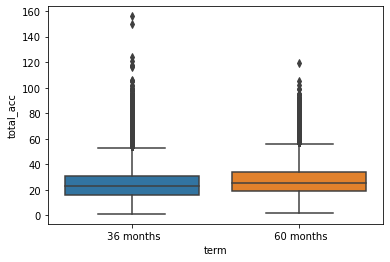

In [16]:
sns.boxplot(x="term", y="total_acc", data=df)

### Data Preprocessing

In [3]:
# menghilangkan huruf 'months' pada kolom term agar bisa diubah kedalam tipe data float 
df['term'] = df['term'].str.replace('months', '', regex=True).astype(float)

In [4]:
# melihat informasi data dengan menampilkan 5 data teratas
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36.0,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60.0,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36.0,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36.0,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60.0,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# melihat informasi , dari jumlahnya, rata2nya, standard deviasinya, minimum nya, Q1,Q2,Q3, dan nilai maksimum
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,42.605334,13.829236,432.061201,7.327738e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,10.719040,4.357587,243.485550,5.496357e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.670000,1.896000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,36.000000,10.990000,256.690000,4.500000e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,36.000000,13.660000,379.890000,6.300000e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,60.000000,16.490000,566.580000,8.896000e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,60.000000,26.060000,1409.990000,7.500000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  float64
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [7]:
# menghapus kolom yang tidak mempunyai isi (0 non-null)
df.drop(['annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m','open_il_24m'
            ,'mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m','Unnamed: 0','policy_code','application_type','issue_d'
        ,'next_pymnt_d'],axis=1, inplace=True)

In [8]:
# menghapus kolom yang tidak dipakai
df.drop(['url','desc','title','zip_code','addr_state','earliest_cr_line','last_pymnt_d','last_credit_pull_d','emp_title'],axis=1, inplace=True)

In [9]:
# mengecek kembali apakah data yang sudah di drop sudah berhasil
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  float64
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_length                   445277 non-null  object 
 11  home_ownership               466285 non-null  object 
 12  annual_inc                   466281 non-null  float64
 13 

#### Cek missing value dan handle missing value

In [10]:
missing = pd.isnull(df).sum()
missing

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
loan_status                         0
pymnt_plan                          0
purpose                             0
dti                                 0
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        340
total_acc   

In [11]:
rasio = missing.div(len(df))
rasio

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_length                     0.045054
home_ownership                 0.000000
annual_inc                     0.000009
verification_status            0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
purpose                        0.000000
dti                            0.000000
delinq_2yrs                    0.000062
inq_last_6mths                 0.000062
mths_since_last_delinq         0.536906
mths_since_last_record         0.865666
open_acc                       0.000062
pub_rec                        0.000062
revol_bal                      0.000000


In [12]:
mmodus = ['next_pymnt_d','emp_length']
mmean = ['annual_inc','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc','pub_rec','revol_util',
         'total_acc','collections_12_mths_ex_med','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim'
        ,'mths_since_last_record','mths_since_last_major_derog']

for feature in mmean:
        if feature in df.columns.values:
            df[feature] = df[feature].fillna(df[feature].mean())
            
for feature in mmodus:
        if feature in df.columns.values:
            df[feature] = df[feature].fillna(df[feature].value_counts().index[0])

In [13]:
df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
loan_status                    0
pymnt_plan                     0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymn

### Duplicate

In [14]:
df[df[['member_id','loan_status']].duplicated(keep=False)].sort_values('member_id')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim


### Outliers

Text(0.5, 0, 'Total_acc')

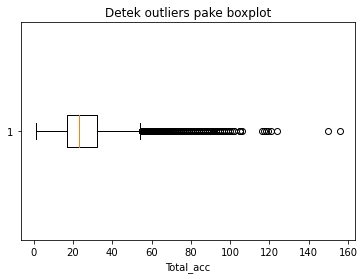

In [15]:
#outlier cek dan handle total_acc
plt.boxplot(list(df.total_acc), vert=False)
plt.title("Detek outliers pake boxplot")
plt.xlabel('Total_acc')

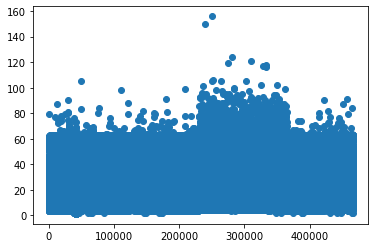

In [16]:
plt.scatter(range(0,len(list(df.total_acc))), list(df.total_acc))
plt.show()

In [17]:
# IQR
Q1 = np.percentile(df['total_acc'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(df['total_acc'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("sebelum_outliers: ", df.shape)

# Upper bound
upper = np.where(df['total_acc'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['total_acc'] <= (Q1-1.5*IQR))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("setelah_outliers: ", df.shape)


sebelum_outliers:  (466285, 44)
setelah_outliers:  (457611, 44)


Text(0.5, 0, 'Total_acc')

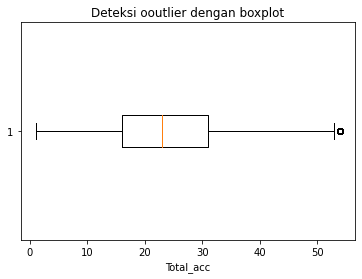

In [18]:
#outlier cek dan handle
plt.boxplot(list(df.total_acc ), vert=False)
plt.title("Deteksi ooutlier dengan boxplot")
plt.xlabel('Total_acc')

### Label Encoder


In [19]:
kategori = ['grade','sub_grade','emp_length','home_ownership','verification_status','loan_status'
           ,'purpose','initial_list_status','pymnt_plan']
df_cat = df[kategori]
df_cat.head()

,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,initial_list_status,pymnt_plan
0,B,B2,10+ years,RENT,Verified,Fully Paid,credit_card,f,n
1,C,C4,< 1 year,RENT,Source Verified,Charged Off,car,f,n
2,C,C5,10+ years,RENT,Not Verified,Fully Paid,small_business,f,n
3,C,C1,10+ years,RENT,Source Verified,Fully Paid,other,f,n
4,B,B5,1 year,RENT,Source Verified,Current,other,f,n


In [20]:
# ubah kedalam bentuk numerik
encoded_data = LabelEncoder()

for feature in kategori:
    if feature in df.columns.values:
        df[feature] = encoded_data.fit_transform(df[feature])

In [21]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36.0,10.65,162.87,1,6,...,0.00,0.00,0.00,171.62,0.0,42.852547,0.0,191.913517,138801.713385,30379.087771
1,1077430,1314167,2500,2500,2500.0,60.0,15.27,59.83,2,13,...,0.00,117.08,1.11,119.66,0.0,42.852547,0.0,191.913517,138801.713385,30379.087771
2,1077175,1313524,2400,2400,2400.0,36.0,15.96,84.33,2,14,...,0.00,0.00,0.00,649.91,0.0,42.852547,0.0,191.913517,138801.713385,30379.087771
3,1076863,1277178,10000,10000,10000.0,36.0,13.49,339.31,2,10,...,16.97,0.00,0.00,357.48,0.0,42.852547,0.0,191.913517,138801.713385,30379.087771
4,1075358,1311748,3000,3000,3000.0,60.0,12.69,67.79,1,9,...,0.00,0.00,0.00,67.79,0.0,42.852547,0.0,191.913517,138801.713385,30379.087771


In [22]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = df.corr()["loan_status"].sort_values()
korelasi

out_prncp                     -0.422255
out_prncp_inv                 -0.422224
member_id                     -0.298594
id                            -0.293607
recoveries                    -0.187925
term                          -0.145493
initial_list_status           -0.140378
total_rec_int                 -0.127954
collection_recovery_fee       -0.125223
dti                           -0.112019
funded_amnt_inv               -0.096542
sub_grade                     -0.093806
funded_amnt                   -0.092949
grade                         -0.091785
loan_amnt                     -0.091284
int_rate                      -0.083302
revol_util                    -0.070299
installment                   -0.057268
open_acc                      -0.051550
verification_status           -0.044633
revol_bal                     -0.036598
pub_rec                       -0.036529
delinq_2yrs                   -0.034626
collections_12_mths_ex_med    -0.022242
acc_now_delinq                -0.013580


### Feature Engineering

In [22]:
df['TotalIncome']=df['annual_inc']
df['Loan/Income']=df['loan_amnt']/df['TotalIncome']
df['Loan/Term']=df['loan_amnt']/df['term']
df['RepaymentRatio']=(df['Loan/Term']*1000)/df['TotalIncome']

In [23]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,TotalIncome,Loan/Income,Loan/Term,RepaymentRatio
0,1077501,1296599,5000,5000,4975.0,36.0,10.65,162.87,1,6,...,0.0,42.852547,0.0,191.913517,138801.713385,30379.087771,24000.0,0.208333,138.888889,5.787037
1,1077430,1314167,2500,2500,2500.0,60.0,15.27,59.83,2,13,...,0.0,42.852547,0.0,191.913517,138801.713385,30379.087771,30000.0,0.083333,41.666667,1.388889
2,1077175,1313524,2400,2400,2400.0,36.0,15.96,84.33,2,14,...,0.0,42.852547,0.0,191.913517,138801.713385,30379.087771,12252.0,0.195886,66.666667,5.441288
3,1076863,1277178,10000,10000,10000.0,36.0,13.49,339.31,2,10,...,0.0,42.852547,0.0,191.913517,138801.713385,30379.087771,49200.0,0.203252,277.777778,5.645890
4,1075358,1311748,3000,3000,3000.0,60.0,12.69,67.79,1,9,...,0.0,42.852547,0.0,191.913517,138801.713385,30379.087771,80000.0,0.037500,50.000000,0.625000


In [25]:
transformation_svm = MinMaxScaler().fit(df[['annual_inc','loan_amnt','TotalIncome','term']])
df[['annual_inc','loan_amnt','TotalIncome','term']]=transformation_svm.transform(df[['annual_inc','loan_amnt','TotalIncome','term']])
 
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,TotalIncome,Loan/Income,Loan/Term,RepaymentRatio
0,1077501,1296599,0.130435,5000,4975.0,0.0,10.65,162.87,1,6,...,0.0,42.852547,0.0,191.913517,138801.713385,30379.087771,0.002948,0.208333,138.888889,5.787037
1,1077430,1314167,0.057971,2500,2500.0,1.0,15.27,59.83,2,13,...,0.0,42.852547,0.0,191.913517,138801.713385,30379.087771,0.003748,0.083333,41.666667,1.388889
2,1077175,1313524,0.055072,2400,2400.0,0.0,15.96,84.33,2,14,...,0.0,42.852547,0.0,191.913517,138801.713385,30379.087771,0.001381,0.195886,66.666667,5.441288
3,1076863,1277178,0.275362,10000,10000.0,0.0,13.49,339.31,2,10,...,0.0,42.852547,0.0,191.913517,138801.713385,30379.087771,0.006309,0.203252,277.777778,5.645890
4,1075358,1311748,0.072464,3000,3000.0,1.0,12.69,67.79,1,9,...,0.0,42.852547,0.0,191.913517,138801.713385,30379.087771,0.010416,0.037500,50.000000,0.625000


In [26]:
# proses train split, membagi data ke dalam data training 80% dan data testing 20 %
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("t Test : ", len(y_test))

X Train :  366088
y Train :  366088
X Test :  91523
t Test :  91523


### Modeling

In [27]:
# menggunakan algoritma logisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

C:\Users\giryi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred = LR.predict(X_test)
logreg_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
logreg_test['prediction'] = y_pred
logreg_test.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,TotalIncome,Loan/Income,Loan/Term,RepaymentRatio,loan_status,prediction
221291,1222064,1463103,0.217391,8000,8000.0,0.0,6.03,243.49,0,0,...,0.0,191.913517,138801.713385,30379.087771,0.006949,0.148148,222.222222,4.115226,5,5
221029,1225976,1466666,1.000000,35000,35000.0,1.0,23.13,989.29,5,27,...,0.0,191.913517,138801.713385,30379.087771,0.010550,0.432099,583.333333,7.201646,5,5
83649,7655412,9337522,0.246377,9000,9000.0,0.0,17.10,321.33,2,14,...,0.0,0.000000,112258.000000,33900.000000,0.007749,0.150000,250.000000,4.166667,5,1
201301,1492924,1753222,0.101449,4000,4000.0,0.0,7.62,124.65,0,2,...,0.0,60.000000,4483.000000,17500.000000,0.003748,0.133333,111.111111,3.703704,0,1
310545,26579186,29072243,0.310145,11200,11200.0,1.0,15.61,270.05,3,15,...,0.0,0.000000,308980.000000,26400.000000,0.015084,0.097391,186.666667,1.623188,1,1


In [30]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(LR.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.617
Accuracy of logistic regression classifier test data: 0.621


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [35]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9735476328354621
